🗃️ **Heart Attack Analysis & Prediction with machine learning models**

Content :
1. Preparation
2. EDA
3. Data Preprocessing
4. Modeling

# 🧪 Preparation
**Import Packages & Dataset**



- Import Packages 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Import Dataset

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount ('/content/drive')

# Import dataset
df = pd.read_csv("/content/drive/MyDrive/heart.csv")

Mounted at /content/drive


**Understanding Data**

- Obeservation in general

In [ ]:
# Info of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


🔍**Observation**
- Tidak ada baris yang hilang di seluruh kumpulan data, sehingga tidak perlu mengisi/menghapus nilai apa pun
- Semua kolom kecuali *oldpeak* (float) bertipe data int.

In [ ]:
# Column contents
print(df.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [ ]:
# Total of row and column (shape of data)
print("The shape of the dataset is : ", df.shape)
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

The shape of the dataset is :  (303, 14)
Number of rows are : 303 ,and number of columns are : 14


In [ ]:
# Preview of the first 5 rows of the data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Checking the number of unique values
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


🔍**Observation**
- Perlu research lebih lanjut untuk penentuan nilai 0 dan 1 dalam "sex"
- Ada 4 tipe chest pain
- Exercise induced angina (1 = Yes, 0 = No)

In [ ]:
# Separating the columns in categorical and continuous
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)


The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [ ]:
# Missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

🔍**Observation**
- Tidak ada nilai yang hilang, sehingga semua fitur dapat digunakan untuk analisis

In [ ]:
# Summary Statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


🔍**Observation**
- Rata-rata usia kelompok 29 hingga 77 adalah 54.5 tahun
- Rata-rata denyut jantung kelompok adalah 149.6 dengan minimal 133.5 dan tertinggi 202
- Rata-rata tekanan darah kelompok adalah 131.6 dengan minimal 120 dan tertinggi 200
- Rata-rata kolesterol kelompok adalah 246 dengan minimal 126 dan tertinggi 564

<function matplotlib.pyplot.show(*args, **kw)>

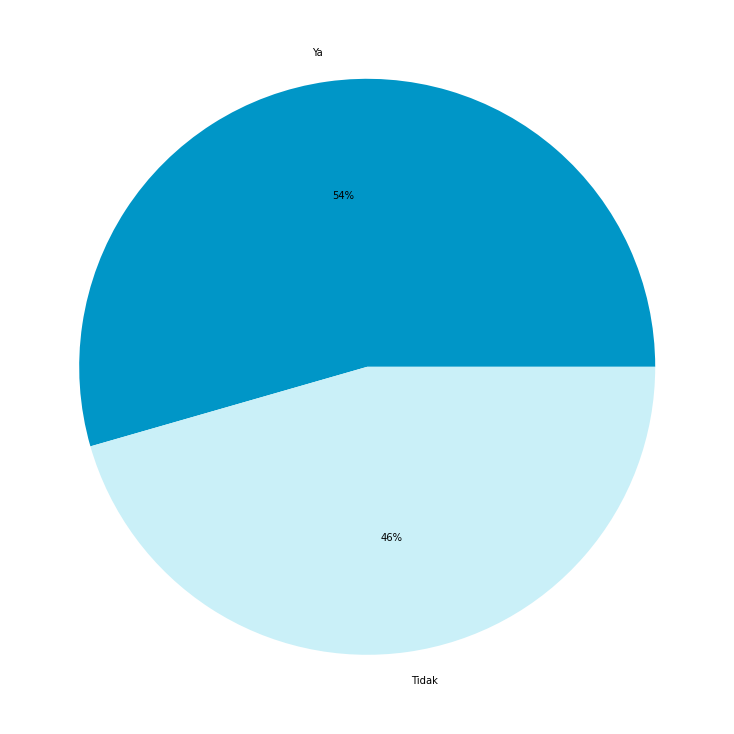

In [57]:
#Visualization of Output
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
color_palette = ["#0096c7","#caf0f8"]
labels = ['Ya','Tidak']
output = df.output.value_counts()
ax.pie(output, labels=labels,colors=color_palette, autopct='%1.0f%%')
plt.show

🔍**Observation**
- Sebanyak 54% orang memiliki resiko tinggi terkena serangan jantung
- Sebanyak 46% orang memiliki resiko rendah terkena serangan jantung

- Male vs Female

kolom "Sex" mengklasifikasikan pasien dalam kategori 1 atau 0 berdasarkan jenis kelamin mereka. Namun, tidak disebutkan apakah 1 mewakili laki-laki atau perempuan begitu juga untuk 0. Maka dari itu diperlukan analysis lebih lenjut

> ✨ For lil research, According to the Harvard Health department,
Researchers found that throughout life, men were about twice as likely as women to have a heart attack. That higher risk persisted even after they accounted for traditional risk factors for heart disease, including high cholesterol, high blood pressure, diabetes, body mass index, and physical activity.

Berati presentase dengan tingkat resiko yang tinggi akan disimpulkan sebagai laki-laki




In [21]:
# Preview of the first 5 rows of "0" and "1"
X=df[df["sex"]==1].reset_index()  
Y=df[df["sex"]==0].reset_index()   
display(X.head(),Y.head())

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


<function matplotlib.pyplot.show(*args, **kw)>

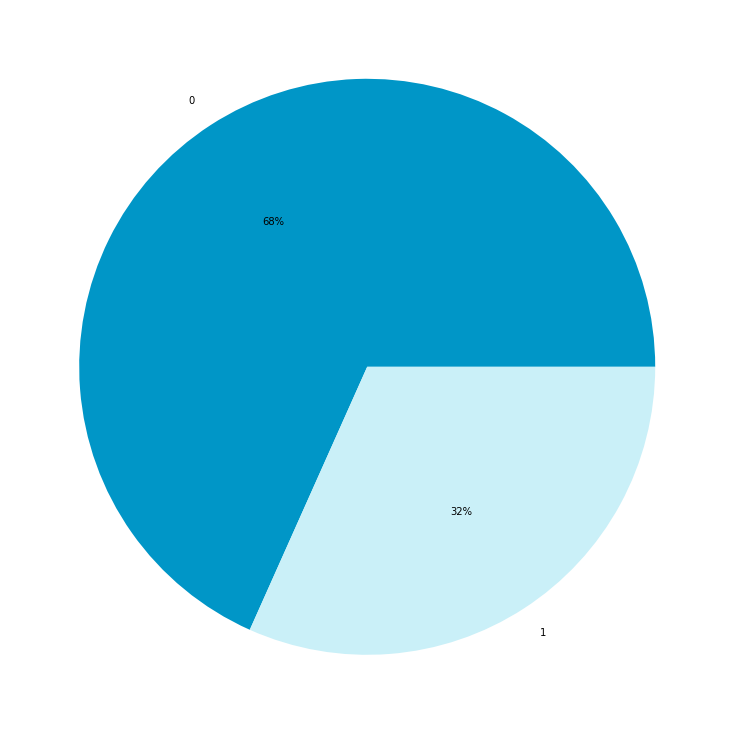

In [56]:
# Visualization of gender distribution
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
labels = ['0','1']
color_palette = ["#0096c7","#caf0f8"]
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sex = df.sex.value_counts()
ax.pie(sex, labels=labels,colors=color_palette, autopct='%1.0f%%')
plt.show

🔍**Observation**
- Lebih dari 68% pasien memiliki satu jenis kelamin (laki-laki atau perempuan) sedangkan sisanya dari jenis kelamin lainnya (31,7%).

In [27]:
# Calculate the the percent of high risk for both labels (1 and 0)
print("Percent of '1' at high risk of heart attack = {} %" .format(round((len(X[X["output"]==1])/len(X)*100),2)))
print("'1' average high-risk age = {} yrs\n" .format(round(X[X["output"]==1]["age"].mean())))

print("Percent of '0' at high risk of heart attack = {} %" .format(round((len(Y[Y["output"]==1])/len(Y)*100),2)))
print("Average high-risk age = {} yrs" .format(round(Y[Y["output"]==1]["age"].mean())))

Percent of '1' at high risk of heart attack = 44.93 %
'1' average high-risk age = 51 yrs

Percent of '0' at high risk of heart attack = 75.0 %
Average high-risk age = 55 yrs


🔍**Observation**
- Jenis Kelamin "1", 44,93% berisiko tinggi mengalami serangan jantung sedangkan untuk jenis kelamin "0", 75,0% berisiko lebih tinggi.
- Berdasarkan perhitungan diatas dan survei oleh para peneliti Harvard, dapat disimpulkan bahwa label "0" adalah laki - laki dan "1" adalah perempuan

# 🚵Exploratory Data Analysis (EDA)

**Univariate**

- Based on Output (Changes of getting heart attack)

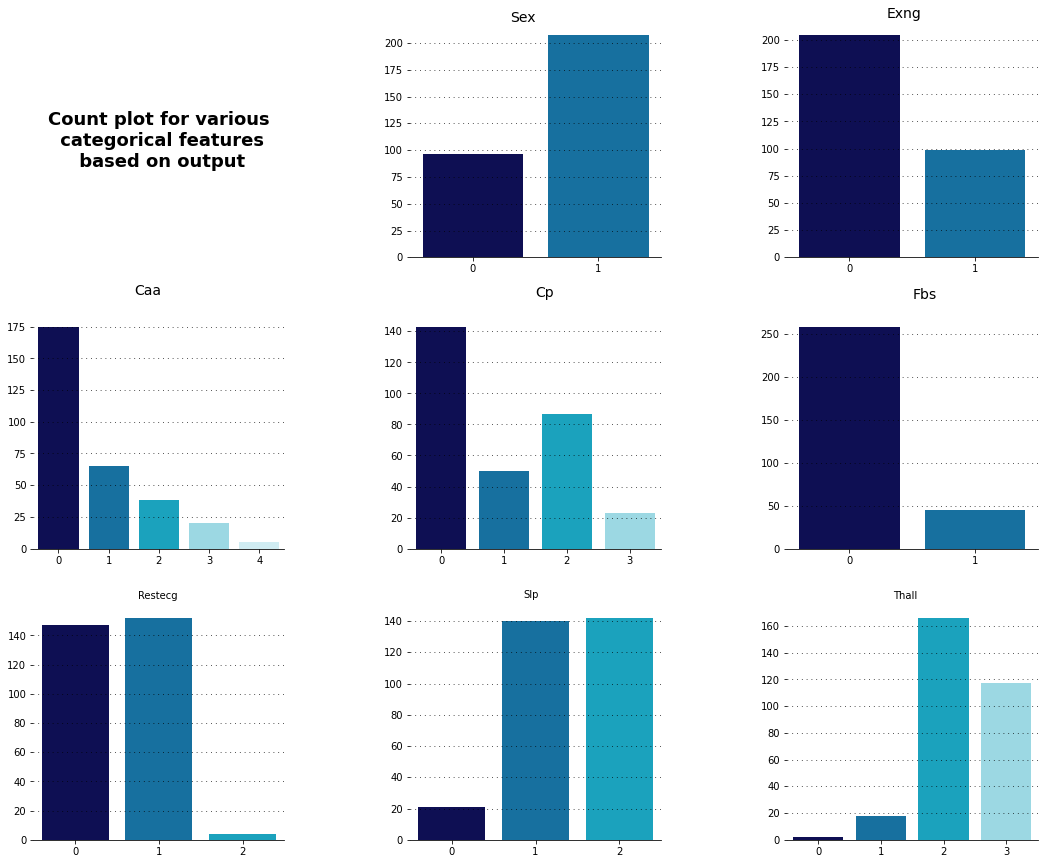

In [32]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

color_palette = ["#03045e","#0077b6","#00b4d8","#90e0ef","#caf0f8"]

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n based on output',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14)
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14)
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14)
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14)
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg')
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp')
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall')
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

**Bivariate**

- Correlation matrix of continuous features

In [39]:
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


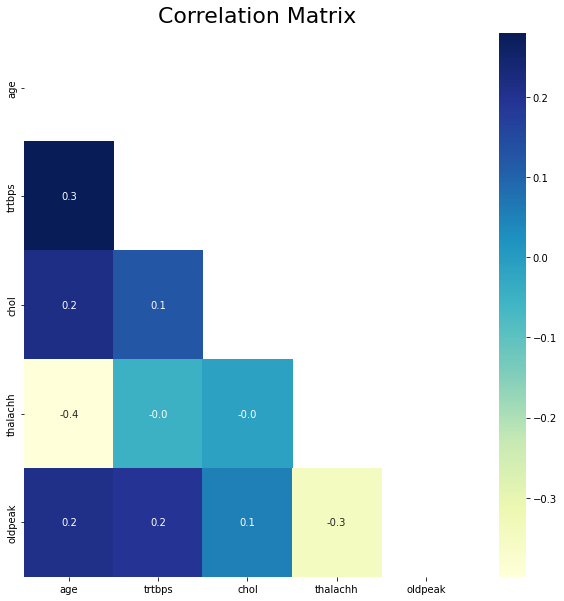

In [41]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22)
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

- Distribution of continuous features according to target variable

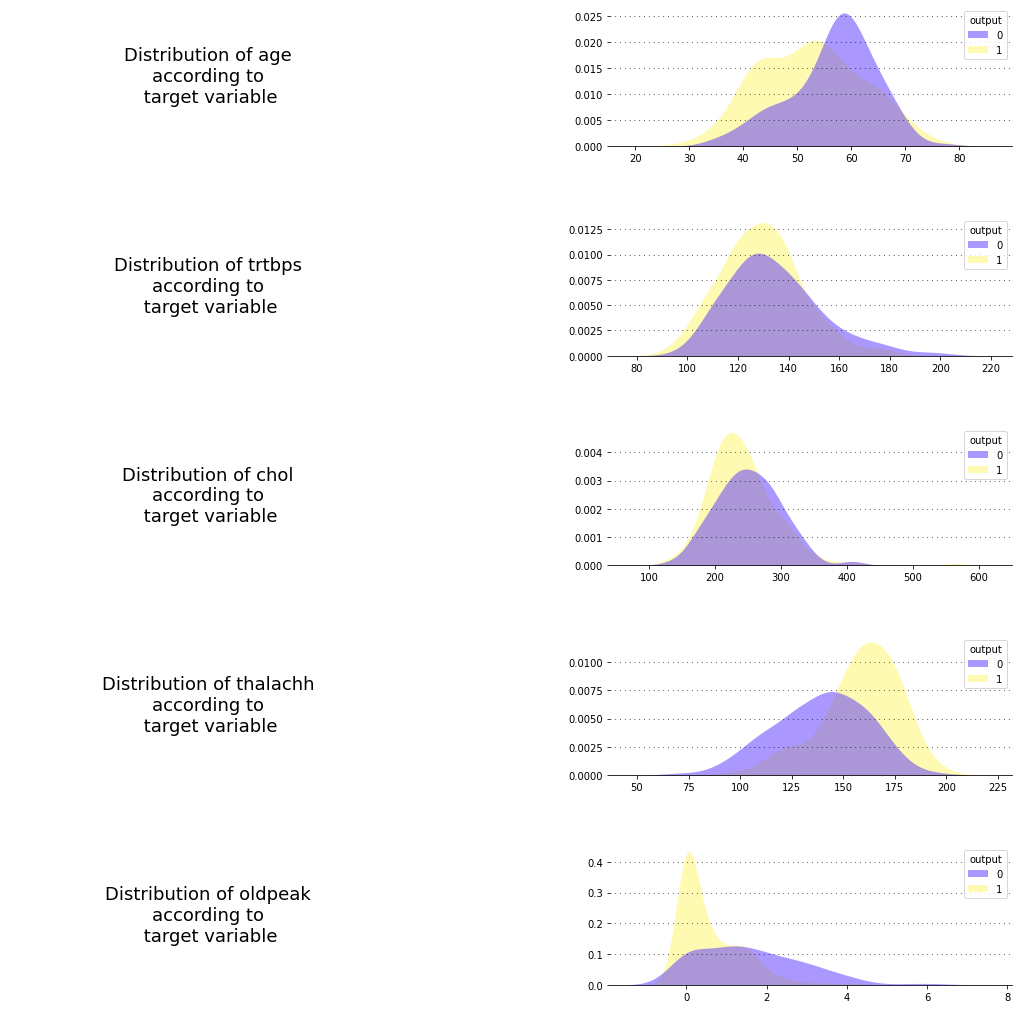

In [59]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

color_palette = ["#5833ff","#fff766"]

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18)
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18)
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18)
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18)
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18)
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

**🔍Observation**
- Orang tua mungkin memiliki kemungkinan lebih tinggi terkena serangan jantung tetapi menurut plot distribusi "Age" dan "Output", terbukti bahwa ini bukan masalahnya.
- Menurut plot distribusi "thalachh" dan "Output", orang dengan detak jantung maksimum yang lebih tinggi memiliki kemungkinan lebih tinggi terkena serangan jantung.
- Menurut plot distribusi "oldpeak" dan "Output", orang dengan oldpeak yang lebih rendah memiliki kemungkinan serangan jantung yang lebih tinggi.
- Orang dengan nyeri dada Non-Anginal, yaitu dengan cp = 2 memiliki kemungkinan lebih tinggi terkena serangan jantung.
- Orang dengan 0 pembuluh darah besar, yaitu dengan caa = 0 memiliki kemungkinan tinggi terkena serangan jantung.
- Orang dengan jenis kelamin = 1 memiliki kemungkinan lebih tinggi terkena serangan jantung.
- Orang dengan thall = 2 memiliki kemungkinan serangan jantung yang jauh lebih tinggi.
- Orang tanpa angina yang diinduksi oleh olahraga, yaitu dengan exng = 0 memiliki kemungkinan lebih tinggi terkena serangan jantung.

# ⚙️Data Preprocessing 

**Import Package**

In [64]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

**Scaling**

In [65]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


**Train and test split**

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


# 🏗️ Modeling

**Import Packages**

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

**Logistic Regression Classifier**

In [77]:
m1 = 'Logistic Regression'

lr = LogisticRegression()
model = lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("\n")
print(classification_report(y_test,lr_predict))

confussion matrix
[[27  2]
 [ 4 28]]


Accuracy of Logistic Regression: 90.1639344262295 



              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Random Forest Classifier** 

In [78]:
m2 = 'Random Forest Classfier'

rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)

rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("\n")
print(classification_report(y_test,rf_predicted))

confussion matrix
[[26  3]
 [ 7 25]]


Accuracy of Random Forest: 83.60655737704919 



              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



<ipython-input-78-2f9190e98892>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


**Gradient Boosting Classifier**

In [81]:
m3 = 'Gradient Boosting Classifier'

gb = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)
gb.fit(X_train,y_train)

gb_predicted = gb.predict(X_test)
gb_conf_matrix = confusion_matrix(y_test, gb_predicted)
gb_acc_score = accuracy_score(y_test, gb_predicted)

print("confussion matrix")
print(gb_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting:",gb_acc_score*100,'\n')
print("\n")
print(classification_report(y_test,gb_predicted))

confussion matrix
[[26  3]
 [ 5 27]]


Accuracy of Random Forest: 86.88524590163934 



              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Model Evaluation**

In [82]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Gradient Boosting'], 'Accuracy': [lr_acc_score*100,
                    rf_acc_score*100,gb_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,90.163934
1,Random Forest,83.606557
2,Gradient Boosting,86.885246


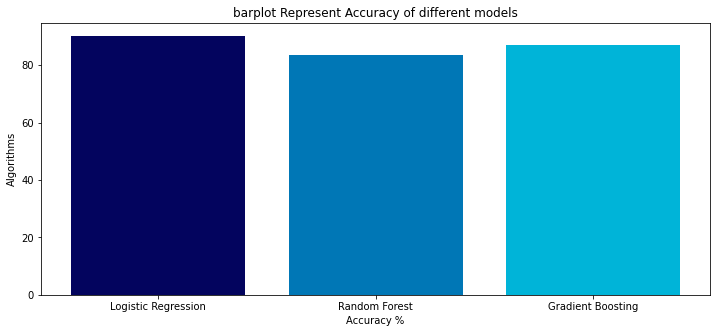

In [89]:
colors = ["#03045e","#0077b6","#00b4d8",]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

**🔍Observation**
- Logistic Regression memberikan akurasi yang baik dibandingkan model yang lain